# Keras tutorial - Emotion Detection in Images of Faces


In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [3]:
def HappyModel(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')
    
    return model

In [4]:
happyModel = HappyModel(X_train.shape[1:])

In [5]:

happyModel.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])


In [7]:
#try with 40 epochs for better results
happyModel.fit(X_train, Y_train, epochs=10, batch_size=15)


Epoch 1/10
600/600 [==============================] - 20s - loss: 0.1623 - acc: 0.9317    
Epoch 2/10
600/600 [==============================] - 20s - loss: 0.0973 - acc: 0.9667    
Epoch 3/10
600/600 [==============================] - 21s - loss: 0.1242 - acc: 0.9583    
Epoch 4/10
600/600 [==============================] - 21s - loss: 0.0934 - acc: 0.9800    
Epoch 5/10
600/600 [==============================] - 21s - loss: 0.0992 - acc: 0.9633    
Epoch 6/10
600/600 [==============================] - 21s - loss: 0.1155 - acc: 0.9550    
Epoch 7/10
600/600 [==============================] - 21s - loss: 0.0700 - acc: 0.9800    
Epoch 8/10
600/600 [==============================] - 21s - loss: 0.0500 - acc: 0.9833    
Epoch 9/10
600/600 [==============================] - 21s - loss: 0.0810 - acc: 0.9750    
Epoch 10/10
600/600 [==============================] - 21s - loss: 0.0411 - acc: 0.9883    


In [8]:

preds = happyModel.evaluate(x = X_test, y = Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 2s     

Loss = 0.123552720944
Test Accuracy = 0.959999997616


[[ 1.]]


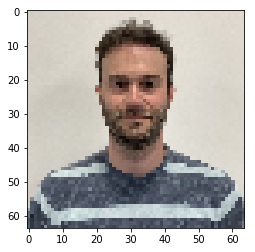

In [9]:

img_path = 'images/fwbAvatar.jpg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

[[ 1.]]


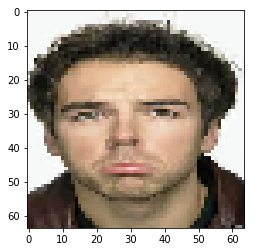

In [11]:

img_path = 'images/sadPerson.jpeg'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))


In [10]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

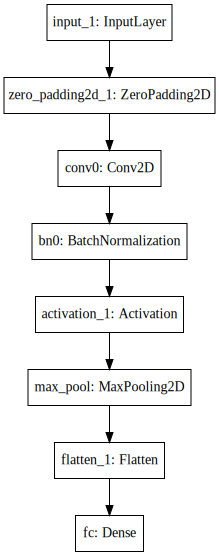

In [12]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))